In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
PLOT_COLORS = ['#268BD2', "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style = 'ticks')
plt.rc('figure', figsize = (8,5), dpi = 100)
plt.rc('axes', labelpad = 20, facecolor = "#ffffff", linewidth = 0.4, grid = True, labelsize = 14)
plt.rc('patch', linewidth = 0)
plt.rc('xtick.major', width = 0.2)
plt.rc('ytick.major', width = 0.2)
plt.rc('grid', color ='#9E9E9E', linewidth = 0.4)
plt.rc('font', family = 'Arial', weight = '400', size = 10)
plt.rc('text', color = '#282828')
plt.rc('savefig', pad_inches = 0.3, dpi = 300)

In [3]:
path = '..\dataset_for_Data_analysis_visualization\googleplaystore.csv'

df = pd.read_csv(path)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## DATA CLEANING

The first step will be to check to see if there are any missing values
check also to see is if the dat types are correct

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [10]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

df['Reviews'].astype('float')

In [11]:
df[df['Reviews'].apply(lambda x: x == '3.0M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [13]:
df.dropna(subset = ['Rating'], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [14]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [15]:
df['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [16]:
df['Type'].value_counts()

Free    8719
Paid     647
0          1
Name: Type, dtype: int64

In [17]:
df[df['Type'].apply(lambda x: x == ' ')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 13 columns):
App               9367 non-null object
Category          9367 non-null object
Rating            9367 non-null float64
Reviews           9367 non-null object
Size              9367 non-null object
Installs          9367 non-null object
Type              9367 non-null object
Price             9367 non-null object
Content Rating    9366 non-null object
Genres            9367 non-null object
Last Updated      9367 non-null object
Current Ver       9363 non-null object
Android Ver       9364 non-null object
dtypes: float64(1), object(12)
memory usage: 951.5+ KB


In [19]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [20]:
df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [21]:
df['Content Rating'].mode()

0    Everyone
dtype: object

In [22]:
df['Content Rating'].fillna('Everyone', inplace = True)

In [23]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [24]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 13 columns):
App               9367 non-null object
Category          9367 non-null object
Rating            9367 non-null float64
Reviews           9367 non-null object
Size              9367 non-null object
Installs          9367 non-null object
Type              9367 non-null object
Price             9367 non-null object
Content Rating    9367 non-null object
Genres            9367 non-null object
Last Updated      9367 non-null object
Current Ver       9363 non-null object
Android Ver       9364 non-null object
dtypes: float64(1), object(12)
memory usage: 951.5+ KB


In [26]:
df[df['Current Ver'].apply(lambda x: x == 'nan')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [27]:
df['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
12.0.4.62276             1
1.62                     1
1.1.700                  1
68                       1
1.67                     1
Name: Current Ver, Length: 2639, dtype: int64

In [28]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up'], dtype=object)

In [29]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [30]:
mode = df['Android Ver'].astype('object').mode()
mode

0    4.1 and up
dtype: object

In [31]:
df['Android Ver'].replace( np.nan, '4.1 and up' , inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 13 columns):
App               9367 non-null object
Category          9367 non-null object
Rating            9367 non-null float64
Reviews           9367 non-null object
Size              9367 non-null object
Installs          9367 non-null object
Type              9367 non-null object
Price             9367 non-null object
Content Rating    9367 non-null object
Genres            9367 non-null object
Last Updated      9367 non-null object
Current Ver       9363 non-null object
Android Ver       9367 non-null object
dtypes: float64(1), object(12)
memory usage: 951.5+ KB


In [33]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [34]:
df['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
12.0.4.62276             1
1.62                     1
1.1.700                  1
68                       1
1.67                     1
Name: Current Ver, Length: 2639, dtype: int64

In [35]:
df[df['Current Ver'].apply(lambda x: x == 'NaN')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [36]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.80,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.10,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.40,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.70,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [37]:
df[df['Reviews'].apply(lambda x: x == '3.0M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [38]:
df.drop(9117, inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 9366
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null object
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9362 non-null object
Android Ver       9366 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [40]:
df['Current Ver'].fillna('Varies with device', inplace = True )

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 9366
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null object
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


Now the data cleaning is done (after lots of work).
Thank God

## DATA ANALYSIS

In [42]:
df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9366,9366,9366.00,9366,9366,9366,9366,9366,9366,9366,9366,9366,9366
unique,8196,33,nan,5992,414,19,2,73,6,115,1300,2638,31
top,ROBLOX,FAMILY,nan,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1747,nan,83,1637,1577,8719,8719,7420,733,319,1419,2061
mean,NaN,NaN,4.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


lets visualize the kind of Types we have from the dataset

In [43]:
df1 = df['Type'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Type', 'Type': 'Number'})
df1

,Type,Number
0,Free,8719
1,Paid,647


[Text(0, 0.5, 'NUMBER'), Text(0.5, 0, 'TYPE')]

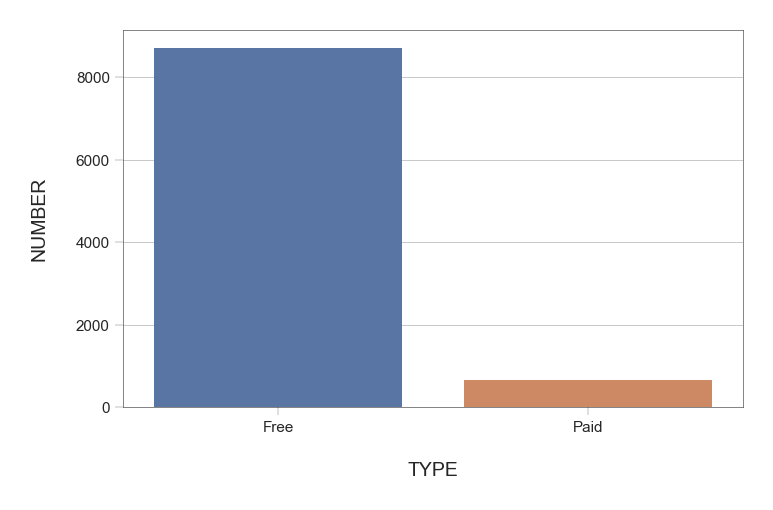

In [44]:
fig,ax = plt.subplots()

sns.barplot(x ='Type', y = 'Number', data = df1 )
ax.set(xlabel = 'TYPE', ylabel = 'NUMBER' )

### There are way more free apps than paid ones

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 9366
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null object
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [46]:
df2 = df['Content Rating'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Content Rating', 'Content Rating': 'No'})
df2

,Content Rating,No
0,Everyone,7420
1,Teen,1084
2,Mature 17+,461
3,Everyone 10+,397
4,Adults only 18+,3
5,Unrated,1


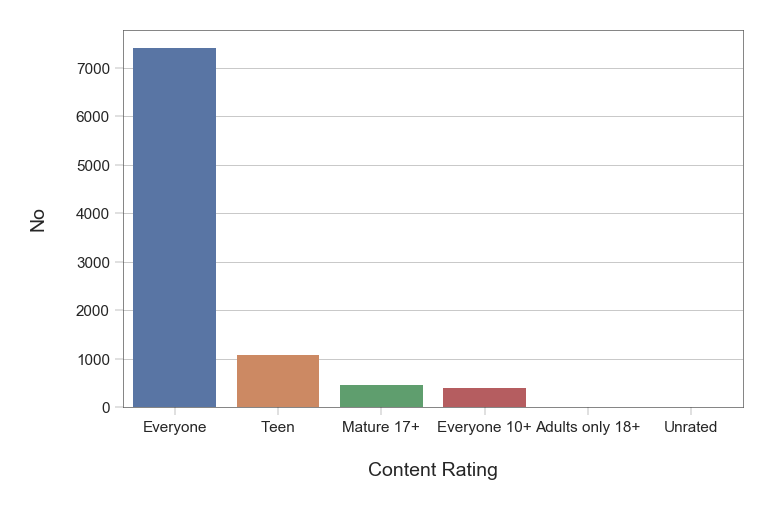

In [47]:
fig,ax = plt.subplots()
sns.barplot(x = 'Content Rating', y = 'No', data = df2, )


### content rating for Everyone is the highest

In [48]:
df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9366,9366,9366.00,9366,9366,9366,9366,9366,9366,9366,9366,9366,9366
unique,8196,33,nan,5992,414,19,2,73,6,115,1300,2638,31
top,ROBLOX,FAMILY,nan,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1747,nan,83,1637,1577,8719,8719,7420,733,319,1419,2061
mean,NaN,NaN,4.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df3 = df['Category'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Category', 'Category': 'No'})
df3

,Category,No
0,FAMILY,1747
1,GAME,1097
2,TOOLS,734
3,PRODUCTIVITY,351
4,MEDICAL,350
5,COMMUNICATION,328
6,FINANCE,323
7,SPORTS,319
8,PHOTOGRAPHY,317
9,LIFESTYLE,314


[Text(0, 0.5, 'Category'), Text(0.5, 0, 'No')]

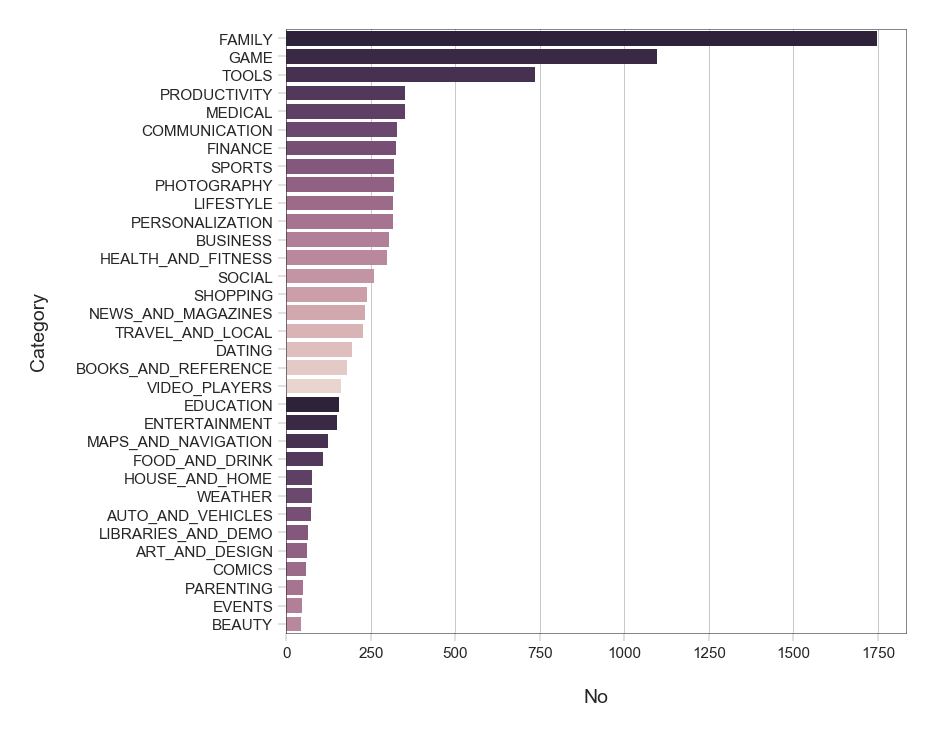

In [50]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(y = 'Category', x = 'No', data = df3, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax )
ax.set(ylabel = 'Category', xlabel = 'No')

In [51]:
df4 = df['Installs'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Installs', 'Installs': 'No'})
df4

,Installs,No
0,"1,000,000+",1577
1,"10,000,000+",1252
2,"100,000+",1150
3,"10,000+",1010
4,"5,000,000+",752
5,"1,000+",713
6,"500,000+",538
7,"50,000+",467
8,"5,000+",432
9,"100,000,000+",409


[Text(0, 0.5, 'Installs'), Text(0.5, 0, 'No')]

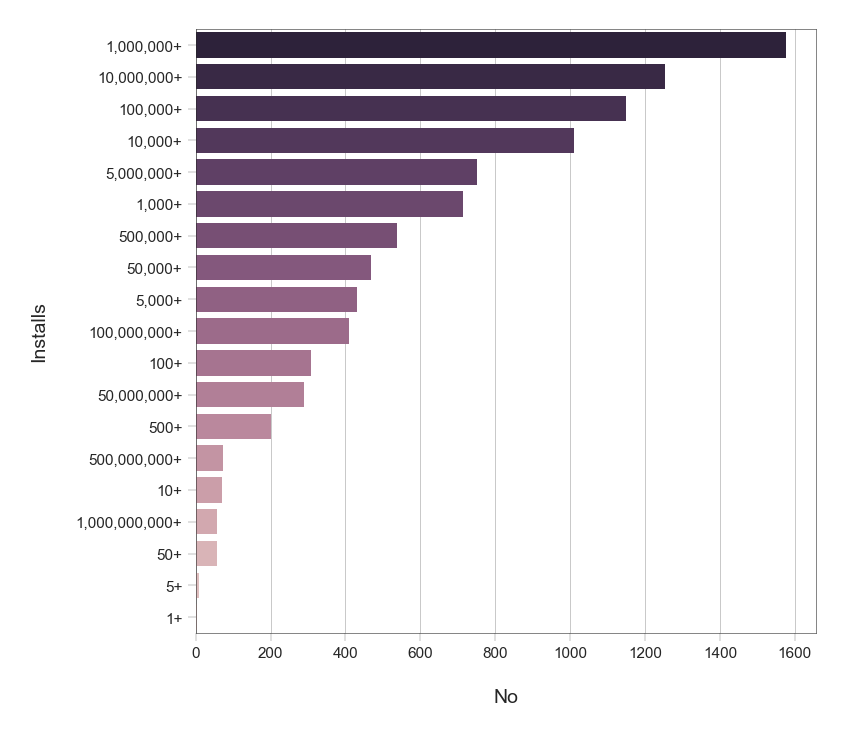

In [52]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(y = 'Installs', x = 'No', data = df4, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax )
ax.set(ylabel = 'Installs', xlabel = 'No')

### we can see from the barcharts that lots of apps have 1 million plus downloads

In [53]:
df5 = df['Android Ver'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Android Ver', 'Android Ver': 'No'})
df5

,Android Ver,No
0,4.1 and up,2061
1,Varies with device,1319
2,4.0.3 and up,1240
3,4.0 and up,1131
4,4.4 and up,875
5,2.3 and up,582
6,5.0 and up,535
7,4.2 and up,338
8,2.3.3 and up,240
9,3.0 and up,211


[Text(0, 0.5, 'Andoid Ver'), Text(0.5, 0, 'No')]

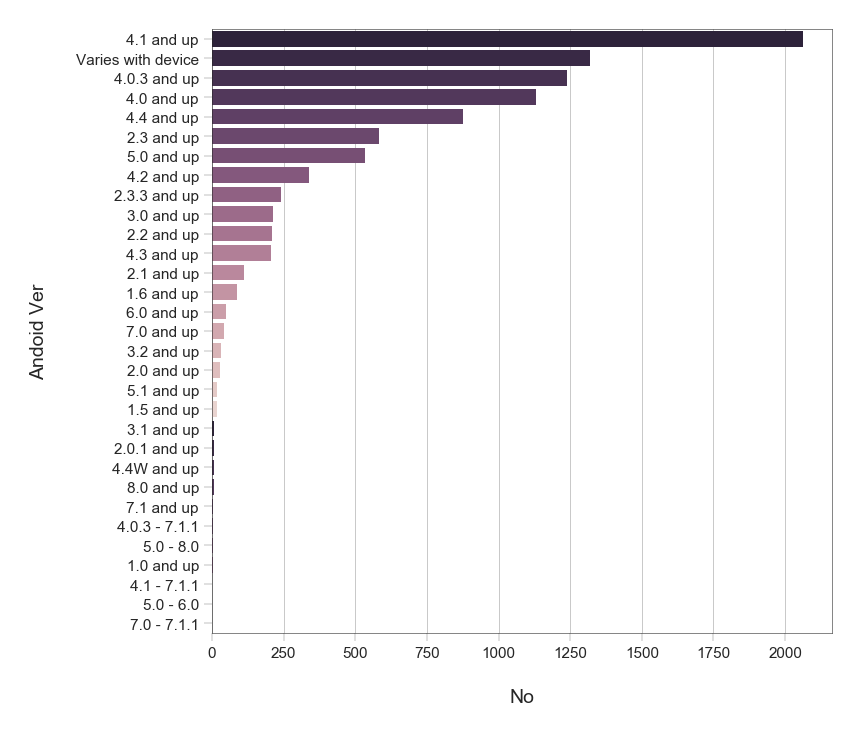

In [54]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(y = 'Android Ver', x = 'No', data = df5, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax )
ax.set(ylabel = 'Andoid Ver', xlabel = 'No')

### 4.1 and up is the Android version of most of the apps

In [55]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## ANALYSIS QUESTION

After visualizing category,installs,type,content rating,android ver
it is now time to ask some questions we will like the data to answer(we want to be as impactfull as possible)

### 1.When were most of the apps last updated(day, year, month) 
### 2.Does type affect our much people will download your app
### 3.Does size affect how much people will download your app 
### 4.Is there a correlation between Rating and reviews
### 5.Is there a correlation between Rating and installs
### 6.DO paid apps have higher or lower rating
### 7.which of the category have an higher rating





## AQ 1

In [56]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [57]:
d = []
for a in df['Last Updated']:
    b = a.split()
    c =  (b[0])
    print (c)
    d.append(c)

January
January
August
June
June
March
April
June
September
July
October
July
April
June
August
June
July
November
August
July
April
March
July
July
April
October
March
July
August
July
May
July
January
April
July
August
July
November
March
July
April
July
April
January
July
November
December
May
May
July
July
July
July
July
July
July
July
August
July
July
July
July
June
July
July
October
July
May
July
August
August
July
July
July
June
June
July
March
July
July
July
July
July
July
August
July
April
August
May
May
July
August
August
July
June
March
April
August
November
May
July
October
February
July
May
June
June
June
September
June
July
July
April
March
April
August
May
November
October
May
July
July
May
July
June
May
June
March
April
July
August
May
August
August
July
August
July
July
May
April
March
June
June
January
August
August
May
July
July
August
May
July
April
May
June
April
June
July
June
November
June
August
October
July
July
August
March
May
August
July
June
May
July
July
J

April
March
June
July
February
July
January
May
June
July
July
December
June
March
July
August
July
July
July
May
May
September
July
May
July
January
September
May
June
March
June
September
November
December
July
May
August
February
August
July
August
January
June
July
November
May
July
August
May
March
October
December
July
August
January
June
July
November
May
July
August
May
March
October
December
July
July
August
June
July
June
December
July
February
November
August
July
July
June
July
December
July
August
March
July
January
May
July
August
July
July
June
February
May
April
November
August
July
July
August
July
February
July
November
April
October
June
September
November
May
May
August
June
June
July
January
August
April
July
December
August
April
December
April
October
November
May
July
August
December
November
May
March
July
August
August
December
August
June
March
August
September
September
January
July
March
May
October
March
May
April
May
January
June
December
January
May
Octo

July
April
May
July
April
May
February
May
August
July
June
August
March
March
April
August
July
April
June
July
March
July
August
August
April
March
March
April
September
August
April
July
March
May
March
March
June
March
July
June
January
May
July
December
July
July
March
July
November
December
March
June
December
May
July
July
August
December
April
December
April
February
October
July
March
September
September
March
June
April
December
August
May
February
July
June
January
May
August
August
March
September
July
June
August
October
October
February
August
September
August
June
July
August
July
July
November
April
June
January
June
May
August
August
August
July
August
June
July
July
June
April
November
February
December
August
March
July
August
July
January
July
May
October
June
May
July
May
July
April
May
September
December
August
October
July
February
August
August
July
February
July
July
June
April
July
April
July
July
July
August
November
July
June
July
July
September
September
Ma

May
June
June
July
July
July
June
May
July
November
July
November
April
June
October
July
February
August
May
February
July
May
March
February
January
May
February
November
April
February
April
August
June
January
October
November
April
September
June
April
May
February
May
June
July
April
July
July
July
May
April
May
July
July
January
July
October
March
March
March
December
August
July
November
July
March
June
July
July
July
August
May
November
July
June
July
July
July
August
March
July
April
January
May
June
March
August
April
July
June
May
August
July
July
May
January
July
September
June
May
August
June
January
August
April
April
July
June
November
March
May
March
October
July
September
August
July
June
July
April
June
March
April
August
July
May
July
February
July
May
February
July
July
January
May
May
August
August
July
August
May
August
May
July
July
December
December
October
February
May
September
July
December
July
May
November
November
June
June
June
March
February
July
July
J

July
July
May
December
July
June
May
May
October
June
May
February
November
June
February
February
August
December
May
August
July
January
July
July
August
September
June
August
July
August
February
June
November
October
January
February
June
May
November
April
March
April
February
August
April
April
July
July
November
June
January
May
March
August
August
October
April
November
August
February
March
March
February
July
December
June
January
January
November
October
August
December
May
March
June
August
July
July
December
February
May
November
February
March
June
March
May
June
March
February
July
February
July
January
April
August
August
October
July
July
June
July
May
July
July
June
December
April
June
April
January
September
October
June
March
February
October
May
June
July
May
January
March
July
March
October
June
September
May
July
October
June
July
July
December
March
November
May
December
May
July
May
October
June
December
July
December
February
February
July
July
July
November
J

In [58]:
df['month'] = d

In [59]:
df['month']

0       January
1       January
2        August
3          June
4          June
         ...   
9362       June
9363       July
9364       July
9365    January
9366       July
Name: month, Length: 9366, dtype: object

In [60]:
df['month'].value_counts()

July         2838
August       1480
June         1107
May           834
March         550
April         500
February      422
January       408
December      338
October       322
November      309
September     258
Name: month, dtype: int64

#### d = []
 #### for a in df['Last Updated']:
  ####   b = (a.split(' '))
  ####   c = (b[-1])
  ####   d.append(c)
#### df['y'] = d
#### df['y'].value_counts()

In [61]:
d = []
for a in df['Last Updated']:
    b = a.split()
    c =  (b[1])
    e = c.split(',')
    d.append((e[0]))

In [62]:
df['date'] = d

In [63]:
df['date']

0        7
1       15
2        1
3        8
4       20
        ..
9362    18
9363    25
9364     6
9365    19
9366    25
Name: date, Length: 9366, dtype: object

In [64]:
d = []
for a in df['Last Updated']:
    b = (a.split(' '))
    c = (b[-1])
    d.append(c)
df['y'] = d
df['y'].value_counts()

2018    6508
2017    1498
2016     651
2015     388
2014     190
2013      94
2012      21
2011      15
2010       1
Name: y, dtype: int64

In [65]:
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,y
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June,20,2018


In [66]:
import datetime
from dateutil import  parser

In [67]:
parser.parse('January 11, 2010').strftime("%A")

'Monday'

In [68]:
df['day'] = df['Last Updated'].apply( lambda x : parser.parse(x).strftime("%A"))

In [69]:
df['day']

0          Sunday
1          Monday
2       Wednesday
3          Friday
4       Wednesday
          ...    
9362       Sunday
9363      Tuesday
9364       Friday
9365       Monday
9366    Wednesday
Name: day, Length: 9366, dtype: object

In [70]:
df['day'].value_counts()

Thursday     1704
Wednesday    1696
Tuesday      1661
Friday       1591
Monday       1531
Saturday      638
Sunday        545
Name: day, dtype: int64

In [71]:
df['month'].value_counts()

July         2838
August       1480
June         1107
May           834
March         550
April         500
February      422
January       408
December      338
October       322
November      309
September     258
Name: month, dtype: int64

In [72]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,y,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January,7,2018,Sunday
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January,15,2018,Monday
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August,1,2018,Wednesday
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June,8,2018,Friday
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June,20,2018,Wednesday


In [73]:
dy = df['y'].value_counts().to_frame().reset_index().rename(columns={'index': 'YEAR', 'y':'No'})
dy

,YEAR,No
0,2018,6508
1,2017,1498
2,2016,651
3,2015,388
4,2014,190
5,2013,94
6,2012,21
7,2011,15
8,2010,1


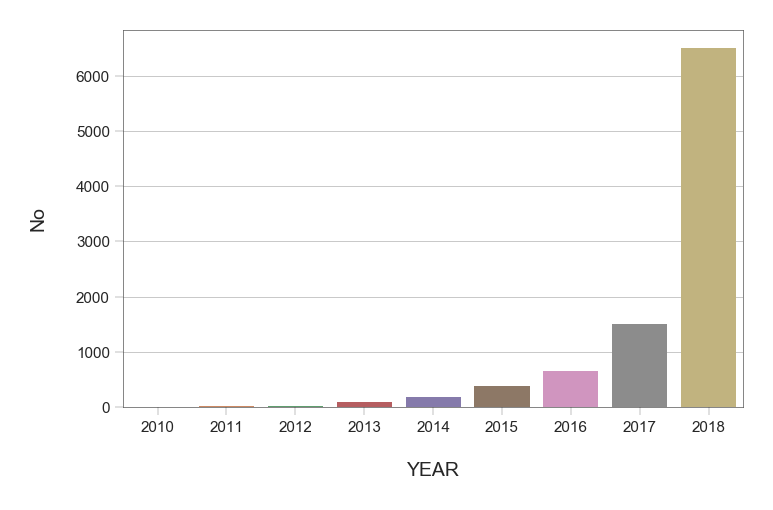

In [74]:
fig,ax = plt.subplots()
sns.barplot(x = 'YEAR', y = 'No', data = dy )

### Most of the apps where updated in 2018

In [75]:
dd = df['day'].value_counts().to_frame().reset_index().rename(columns = {'index': 'DAY', 'day': 'NO'})
dd

,DAY,NO
0,Thursday,1704
1,Wednesday,1696
2,Tuesday,1661
3,Friday,1591
4,Monday,1531
5,Saturday,638
6,Sunday,545


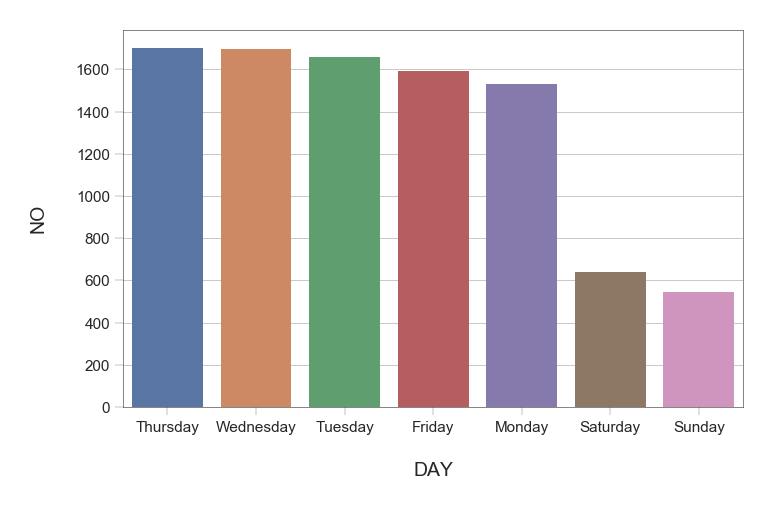

In [76]:
fig,ax = plt.subplots()
sns.barplot(x = 'DAY', y = 'NO', data = dd )

###  The number of apps last updated on Saturday and Sunday are significantly lower compare to other day.
### is it because they are weekends?

In [77]:
dm = df['month'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Month', 'month': 'NO'})
dm

,Month,NO
0,July,2838
1,August,1480
2,June,1107
3,May,834
4,March,550
5,April,500
6,February,422
7,January,408
8,December,338
9,October,322


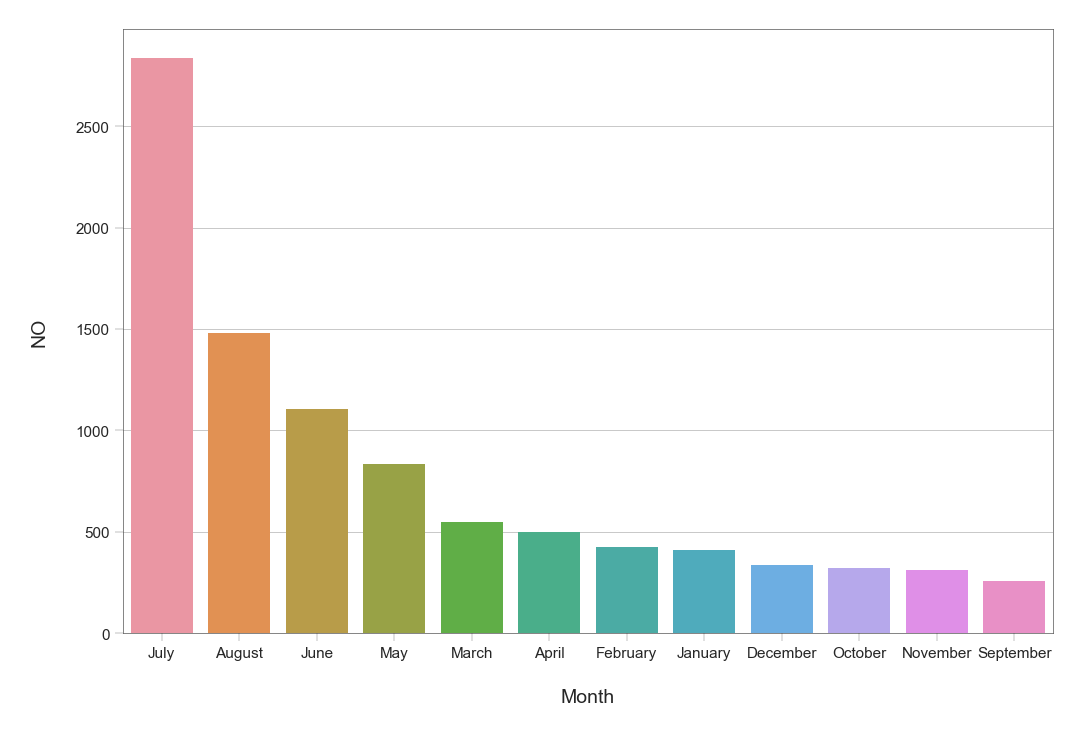

In [78]:
fig,ax = plt.subplots(figsize = (12,8))
sns.barplot(x = 'Month', y = 'NO', data = dm )

### The apps last updated in july is significantly high

## AQ2

In [79]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,y,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January,7,2018,Sunday
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January,15,2018,Monday
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August,1,2018,Wednesday
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June,8,2018,Friday
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June,20,2018,Wednesday


In [80]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [81]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') )

In [82]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') )

In [83]:
df['Installs'] = df['Installs'].astype('int')

In [84]:
df['Installs']

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9362         500
9363        5000
9364         100
9365        1000
9366    10000000
Name: Installs, Length: 9366, dtype: int32

In [85]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
month              object
date               object
y                  object
day                object
dtype: object

In [86]:
df_group_one = df[['Installs', 'Type']]

In [87]:
df_group_one = df_group_one.groupby(['Type'],as_index=False).mean()
df_group_one

,Type,Installs
0,Free,19217171.16
1,Paid,112739.69


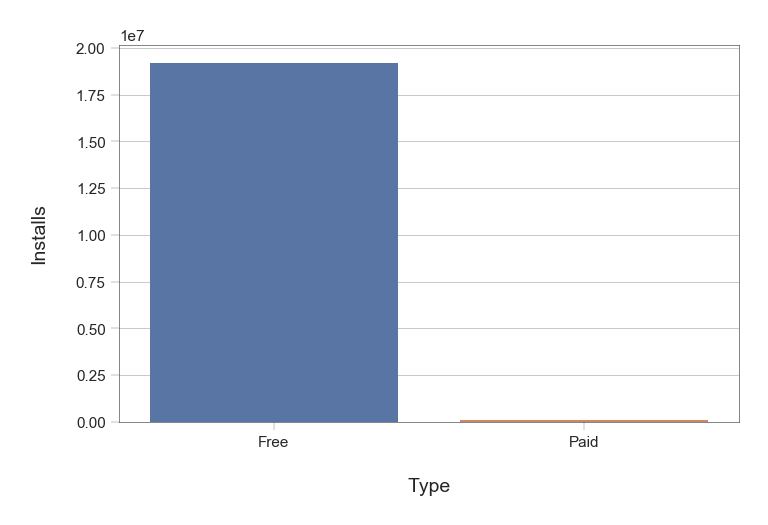

In [88]:
fig,ax = plt.subplots()
sns.barplot(x = 'Type', y = 'Installs', data = df_group_one, ax = ax)

### On average the free apps have more installs numbers compare to paid apps.No suprise there.

## AQ3

In [89]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,y,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January,7,2018,Sunday
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January,15,2018,Monday
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August,1,2018,Wednesday
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June,8,2018,Friday
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June,20,2018,Wednesday


In [90]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [91]:
d = []
for a in df['Size']:
    if a[-1] == 'M':
        b = a.replace('M', '')
        c = float(b) * 10**6 / 10**6
        d.append(c)
    if a[-1] == 'k':
        b = a.replace('k', '')
        c = float(b) * 10**3 / 10**6
        d.append(c)
    elif a == 'Varies with device':
        a = np.nan
        d.append(a)
print (d)        

[19.0, 14.0, 8.7, 25.0, 2.8, 5.6, 19.0, 29.0, 33.0, 3.1, 28.0, 12.0, 20.0, 21.0, 37.0, 2.7, 5.5, 17.0, 39.0, 31.0, 14.0, 12.0, 4.2, 23.0, 6.0, 25.0, 6.1, 4.6, 4.2, 9.2, 5.2, 11.0, 11.0, 4.2, 9.2, 24.0, nan, 11.0, 9.4, 15.0, 10.0, nan, 1.2, 12.0, 24.0, 26.0, 8.0, 7.9, 25.0, 56.0, 57.0, nan, 35.0, 33.0, 33.0, 5.6, 54.0, 0.201, 3.6, 5.7, 17.0, 8.6, 2.4, 27.0, 2.7, 2.5, nan, nan, 7.0, 35.0, 16.0, 16.0, nan, 17.0, 3.4, 8.9, 3.9, 2.9, 38.0, 32.0, 37.0, 15.0, 5.4, 18.0, nan, 38.0, 1.1, nan, nan, 7.9, 35.0, nan, 17.0, 19.0, 14.0, 2.2, 4.5, 17.0, 14.0, 9.8, 21.0, nan, 52.0, 14.0, 25.0, 9.0, nan, 12.0, nan, 35.0, 6.7, 30.0, 2.9, 17.0, 2.9, nan, nan, 2.6, 4.2, 7.1, 57.0, 22.0, 24.0, 21.0, 3.4, 6.4, 3.2, 8.2, 2.9, 23.0, 4.6, 3.1, nan, 4.9, 9.5, nan, nan, nan, nan, nan, 4.2, 5.4, nan, 2.8, 5.0, nan, 5.9, 13.0, 7.1, 6.7, nan, 17.0, 19.0, 6.7, 21.0, nan, 37.0, 15.0, 23.0, 19.0, 23.0, 73.0, 4.9, 6.8, nan, nan, 2.9, 3.5, 4.0, 21.0, 2.3, nan, 10.0, 6.1, 2.1, 42.0, 30.0, nan, nan, nan, 29.0, nan, nan, na

In [92]:
df['Size_mod'] = d
df['Size_mod']

0      19.00
1      14.00
2       8.70
3      25.00
4       2.80
        ... 
9362    2.60
9363   53.00
9364    3.60
9365     nan
9366   19.00
Name: Size_mod, Length: 9366, dtype: float64

[Text(0, 0.5, 'size in mb'), Text(0.5, 0, 'installs')]

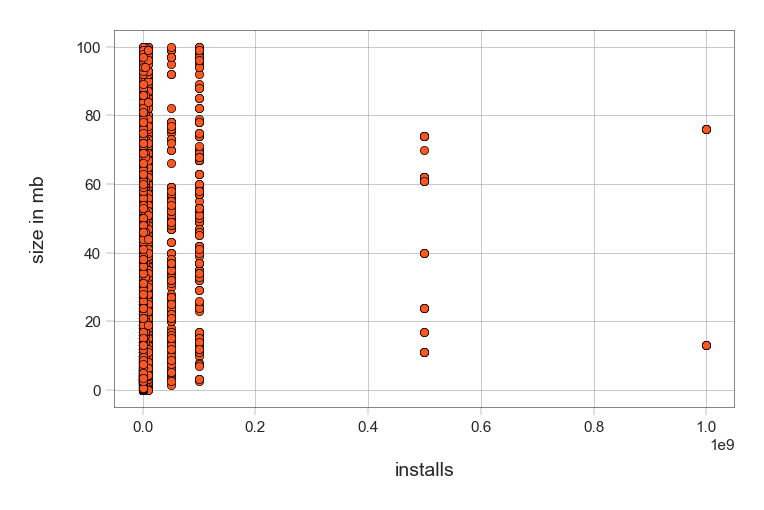

In [93]:
fig,ax = plt.subplots()
ax.scatter(y = df['Size_mod'], x = df['Installs'], color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(ylabel = 'size in mb', xlabel = 'installs')

### from the scatter plot above we see that there is no correlation between the size of apps and installs number

## AQ4

In [94]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,y,day,Size_mod
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January,7,2018,Sunday,19.00
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January,15,2018,Monday,14.00
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August,1,2018,Wednesday,8.70


In [95]:
df.describe()

,Rating,Installs,Size_mod
count,9366.00,9366.00,7729.00
mean,4.19,17897443.73,22.96
std,0.52,91238217.38,23.45
min,1.00,1.00,0.01
25%,4.00,10000.00,5.30
50%,4.30,500000.00,14.00
75%,4.50,5000000.00,33.00
max,5.00,1000000000.00,100.00


In [96]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [97]:
df['Reviews'] = df['Reviews'].astype('int')

In [98]:
df.describe()

,Rating,Reviews,Installs,Size_mod
count,9366.00,9366.00,9366.00,7729.00
mean,4.19,514049.84,17897443.73,22.96
std,0.52,3144042.13,91238217.38,23.45
min,1.00,1.00,1.00,0.01
25%,4.00,186.25,10000.00,5.30
50%,4.30,5930.50,500000.00,14.00
75%,4.50,81532.75,5000000.00,33.00
max,5.00,78158306.00,1000000000.00,100.00


[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Reviews')]

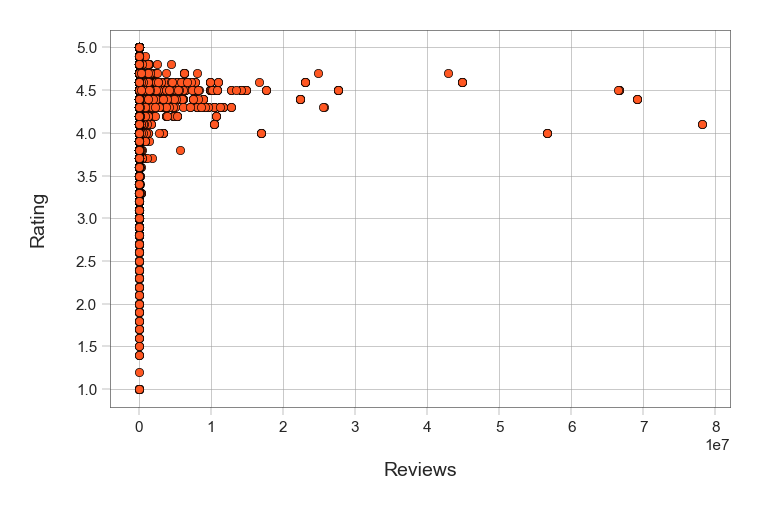

In [99]:
fig,ax = plt.subplots()
ax.scatter(y = df['Rating'], x = df['Reviews'], color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(ylabel = 'Rating', xlabel = 'Reviews')

### From the scatter plot, we can see that there is no correlation between reviews and rating however, we notice that reviews having 10,000,000 and above have rating of 4.0 to 4.7 rating approximately

## AQ5

[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Installs')]

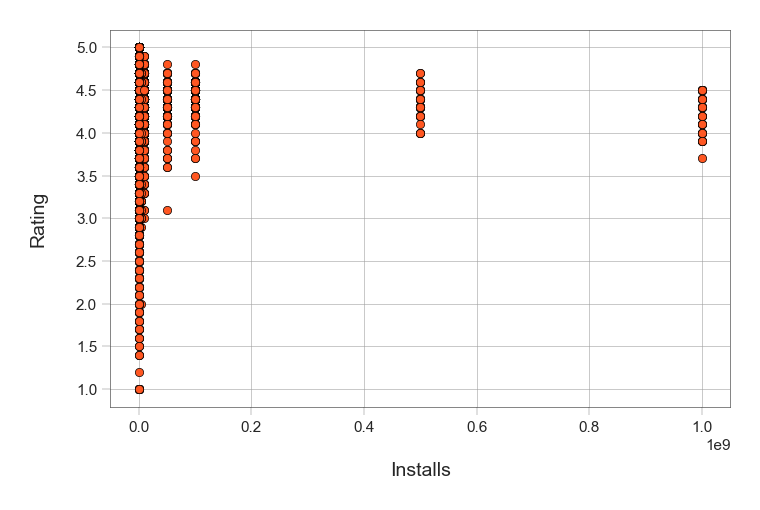

In [100]:
fig,ax = plt.subplots()
ax.scatter(y = df['Rating'], x = df['Installs'], color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(ylabel = 'Rating', xlabel = 'Installs')

### From the scatter plot there is no relationship between rating and installs, but we notice that apps that have 400,000,000 to 600,000,000 installs have 4.0 to 4.7 rating while apps that have 1,000,000,000 have 3.7 to 4.5 rating both approximately

In [101]:
df.corr()

,Rating,Reviews,Installs,Size_mod
Rating,1.00,0.07,0.05,0.08
Reviews,0.07,1.00,0.64,0.24
Installs,0.05,0.64,1.00,0.16
Size_mod,0.08,0.24,0.16,1.00


[Text(0, 0.5, 'Installs'), Text(0.5, 0, 'Reviews')]

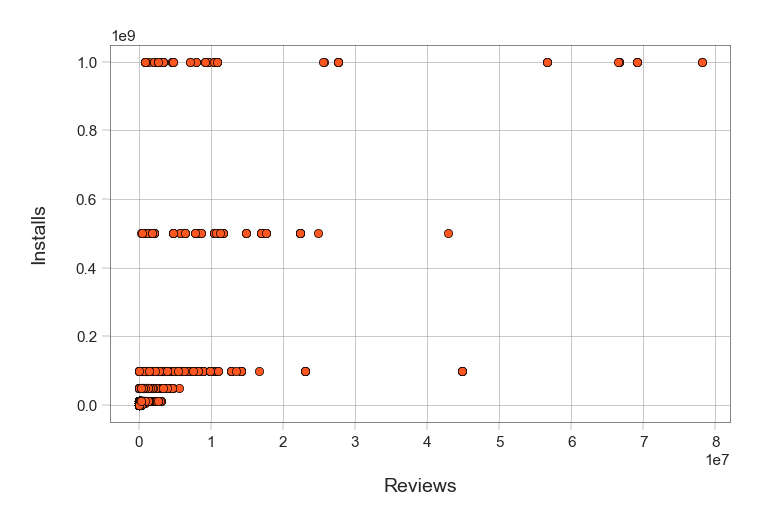

In [102]:
fig,ax = plt.subplots()
ax.scatter(x = df['Reviews'], y = df['Installs'], color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(xlabel = 'Reviews', ylabel = 'Installs')

### There is no correlation between installs and reviews also but we noticed that apps that have reviews of 50,000,000 and above have installs number of 1,000,000,000

## AQ6

In [103]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [104]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', ''))

In [105]:
df['Price'] = df['Price'].astype('float')

In [106]:
df.corr()

,Rating,Reviews,Installs,Price,Size_mod
Rating,1.00,0.07,0.05,-0.02,0.08
Reviews,0.07,1.00,0.64,-0.01,0.24
Installs,0.05,0.64,1.00,-0.01,0.16
Price,-0.02,-0.01,-0.01,1.00,-0.03
Size_mod,0.08,0.24,0.16,-0.03,1.00


[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Price')]

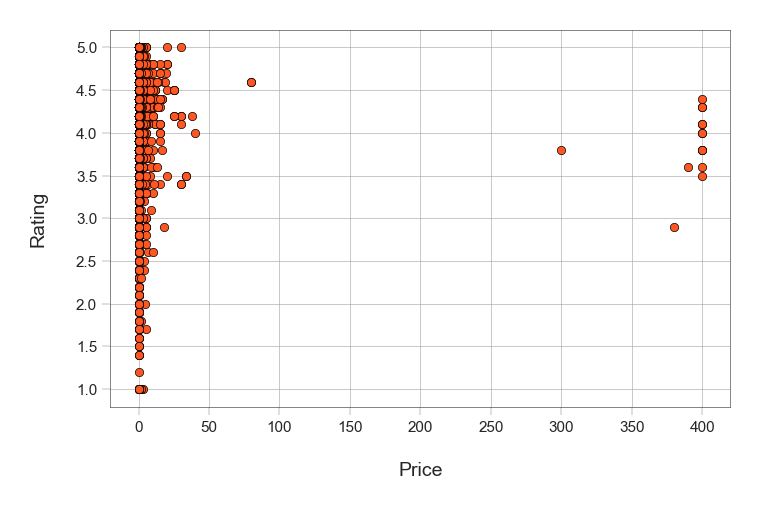

In [107]:
fig,ax = plt.subplots()
ax.scatter(y = df['Rating'] , x = df['Price'] , color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(ylabel = 'Rating', xlabel = 'Price')

### There is also no correlation between price and rating, but we can notice that price of 400 dollars have a rating of 3.5 to 4.4 approximately

## AQ7

In [108]:
dg = df[['Category', 'Rating']]

In [111]:
dg = dg.groupby(['Category'], as_index = False).mean()
d = dg.sort_values('Rating', ascending = False)
d

,Category,Rating
10,EVENTS,4.44
8,EDUCATION,4.39
0,ART_AND_DESIGN,4.36
3,BOOKS_AND_REFERENCE,4.35
23,PERSONALIZATION,4.34
22,PARENTING,4.30
14,GAME,4.29
2,BEAUTY,4.28
15,HEALTH_AND_FITNESS,4.28
26,SHOPPING,4.26


[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Rating')]

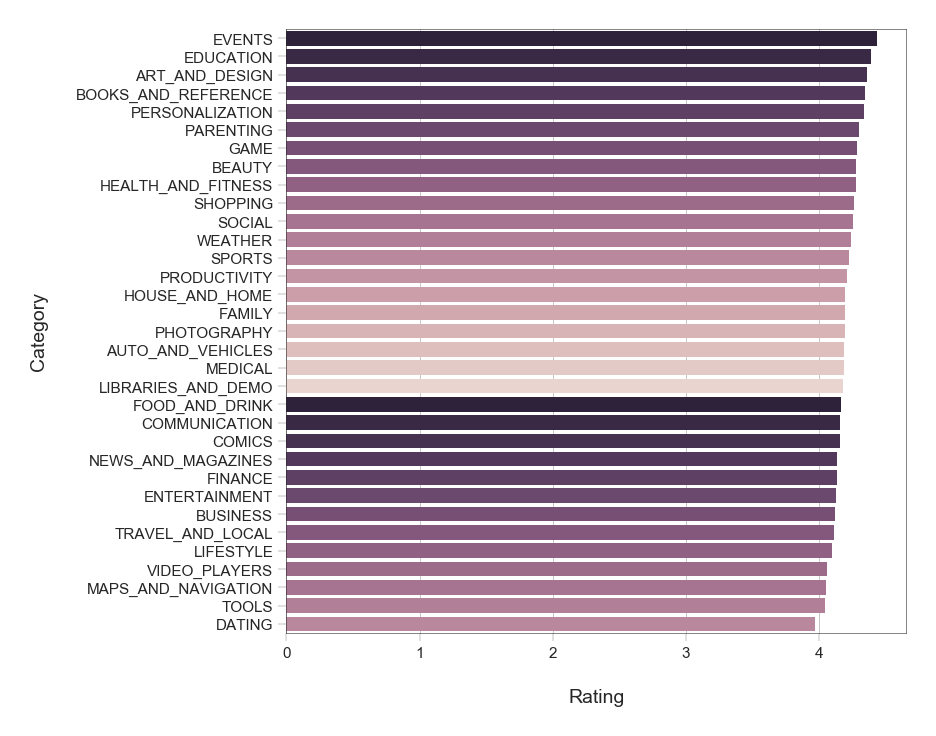

In [110]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(y = 'Category', x = 'Rating', data = d, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax )
ax.set(ylabel = 'Category', xlabel = 'Rating')

### By category event have the highest rating

## CONCLUSION
### 1.Most of the apps were last updated in the month of july,year 2018, while weekends have the lowest amounts of apps last updated
### 2.Yes, people tend to download your apps more if it is free rather than if it is paid
### 3.No, size doesn't determine how much people will download your app
### 4.No, there is no correlation however we notice that reviews having 10,000,000 and above have rating of 4.0 to 4.7 rating approximately¶
### 5.No, there is no correlation,but we notice that apps that have 400,000,000 to 600,000,000 installs have 4.0 to 4.7 rating while apps that have 1,000,000,000 have 3.7 to 4.5 rating both approximately¶
### 6.paid apps do not have a distinguished higher or lower rating
### 7.event category have higher rating
### The most common android version was 4.1 and up
### The most common category was family 
### The most common installs numbew was 1,000,000+
### Most of the apps were free
### The most Content Rating was Everyone
I THANK GOD